In [75]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt

import os
import warnings


In [76]:
for dirname, _, filenames in os.walk('/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')


def analysis(data):
    return pd.DataFrame({"Data Type": data.dtypes, "Unique Count": data.apply(lambda x: x.nunique(), axis=0),
                         "Null Count": data.isnull().sum()})


def barplot(x, y, data):
    plt.figure(figsize=(20, 60))

    for i in enumerate(x):
        plt.subplot(12, 2, i[0]+1)
        sb.barplot(x=x[i[1]], y=y, data=data)
        plt.xlabel(i[1])


def regplot(x, y, data):
    plt.figure(figsize=(20, 60))

    for i in enumerate(x):
        plt.subplot(12, 2, i[0]+1)
        sb.regplot(x=x[i[1]], y=y, data=data,
                   x_estimator=np.mean, ci=68, truncate=False)
        plt.xlabel(i[1])


/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/insurance.csv
/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/conda_dependencies.yml
/home/daftvm/workspace/mast1_ai/ydays/medical_cost_personal/medical_cost.ipynb


In [77]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('female', 'male'), (1, 0), inplace=True)
df.region.replace(('northeast', 'southeast', 'southwest',
                  'northwest'), (0, 1, 2, 3), inplace=True)


In [79]:
df_copy = df.copy()

In [80]:
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [81]:
analysis(df)


,Data Type,Unique Count,Null Count
age,int64,47,0
sex,int64,2,0
bmi,float64,548,0
children,int64,6,0
smoker,int64,2,0
region,int64,4,0
charges,float64,1337,0


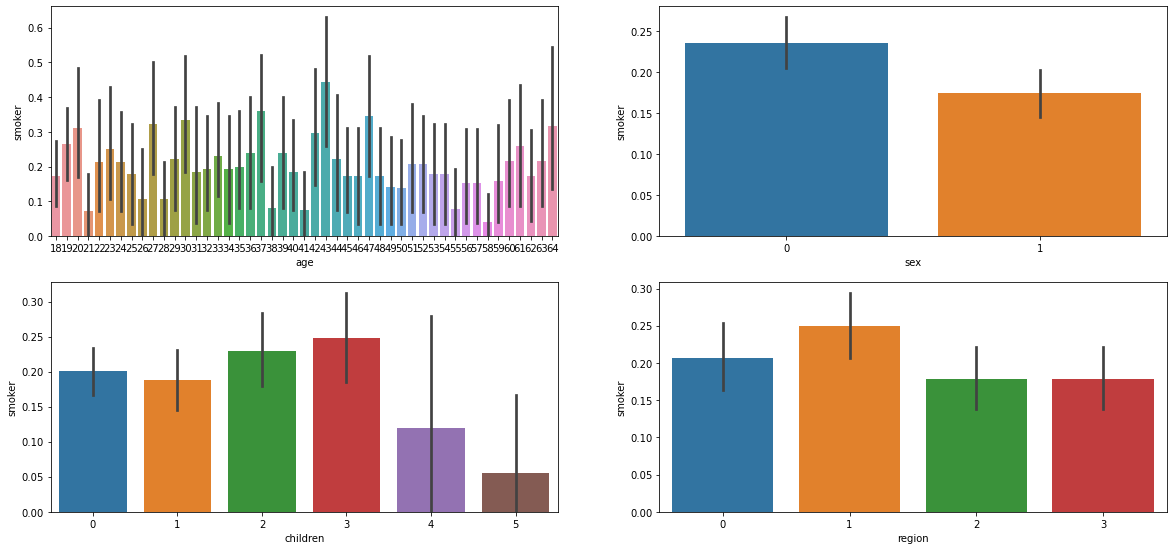

In [82]:
columns = df.drop(['smoker', 'charges', 'bmi'], axis=1)
df_y = df['smoker']
barplot(columns, df_y, df)


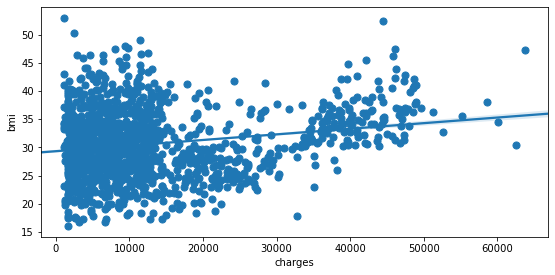

In [83]:
columns = df.drop(['sex', 'smoker', 'children',
                     'region', 'bmi', 'age'], axis=1)
df_y = df['bmi']
regplot(columns, df_y, df)


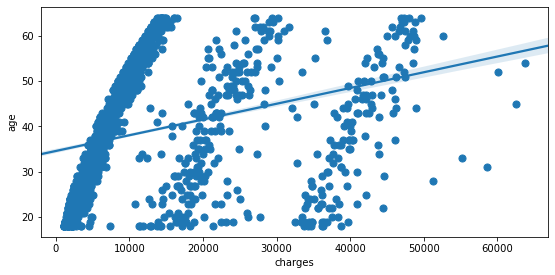

In [84]:
df_y = df['age']
regplot(columns, df_y, df)


<AxesSubplot:>

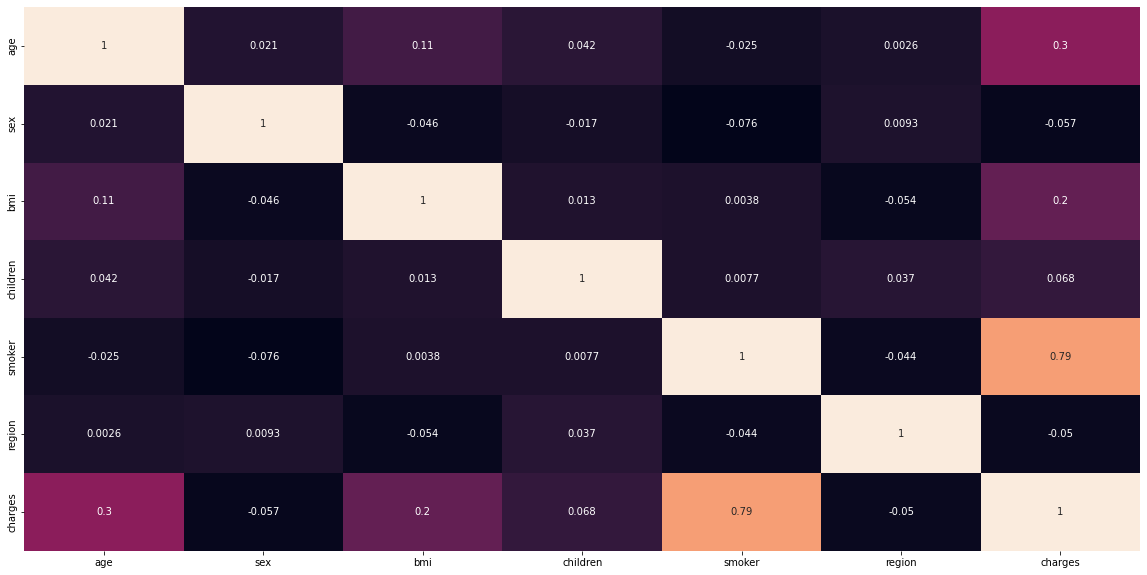

In [85]:
heatmap = df.corr()

ax= plt.figure(figsize=(20, 10))
sb.heatmap(heatmap, cbar=False, annot=True)


In [86]:
df.drop(['region'], axis=1, inplace=True)


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [88]:
scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled = scaler.fit_transform(scaled)
print(df_scaled)


[[-1.43876426  1.0105187  -0.45332    -0.90861367  1.97058663  0.2985838 ]
 [-1.50996545 -0.98959079  0.5096211  -0.07876719 -0.5074631  -0.95368917]
 [-0.79795355 -0.98959079  0.38330685  1.58092576 -0.5074631  -0.72867467]
 ...
 [-1.50996545  1.0105187   1.0148781  -0.90861367 -0.5074631  -0.96159623]
 [-1.29636188  1.0105187  -0.79781341 -0.90861367 -0.5074631  -0.93036151]
 [ 1.55168573  1.0105187  -0.26138796 -0.90861367  1.97058663  1.31105347]]


In [89]:
xs = df['smoker']
xs1 = xs.values.reshape(-1, 1)


In [90]:
x = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

In [91]:
from sklearn.model_selection import train_test_split as tts


In [92]:
x_train, x_test, y_train, y_test = tts(xs1, y, test_size=.33)


In [93]:
from sklearn.linear_model import LinearRegression as lr


In [94]:
lr.fit(x_train, y_train)
pred = lr.predict(x_train, y_train)

TypeError: fit() missing 1 required positional argument: 'y'